# Introduction



# Dataset and Libraries setup

##Libraries and Dataset setup

Download the dataset and the libraries needed.

**Libraries**
- pandas
- numpy
- kaggle
- plotly

In [ ]:
### Download files
! apt-get update > /dev/null
! apt-get upgrade > /dev/null
! apt-get install unzip > /dev/nulll

# Python libs
! pip install -q kaggle > /dev/null
! pip install plotly==4.14.3 > /dev/null
! pip install -U kaleido > /dev/null

Import plot and other useful libraries

In [ ]:
### Import section

# Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

# Others
import csv
from io import StringIO
from datetime import datetime

##Import dataset
There are two ways to download the dataset, one from kaggle using kaggle api the other one from github (the dataset may be out of date)

In [ ]:
### Delete old folders and create new ones
! rm -r /content/data > /dev/null
! mkdir /content/data/ > /dev/null
! rm -r ~/.kaggle > /dev/null
! mkdir ~/.kaggle > /dev/null

rm: cannot remove '/content/data': No such file or directory


### Kaggle

Connect to kaggle, download datataset and setup the files

In [ ]:
### Kaggle download setup 

# Insert here the link to the token json file
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM' -P /content -O kaggle.json > /dev/null

# Copy token in the right folder
! cp kaggle.json ~/.kaggle/ > /dev/null
! chmod 600 ~/.kaggle/kaggle.json > /dev/null

# Download dataset
! kaggle datasets download -d adityakadiwal/water-potability -p /content/data > /dev/null

# Unzip and remove the zip
! unzip /content/data/water-potability.zip -d /content/data > /dev/null
! rm /content/data/water-potability.zip > /dev/null

--2021-09-25 09:25:18--  https://docs.google.com/uc?export=download&id=1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM
Resolving docs.google.com (docs.google.com)... 172.217.219.139, 172.217.219.100, 172.217.219.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.219.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/db6a5npqodc377gvkgd15enp2hk0s0sp/1632561900000/08916338998030749634/*/1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM?e=download [following]
--2021-09-25 09:25:18--  https://doc-04-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/db6a5npqodc377gvkgd15enp2hk0s0sp/1632561900000/08916338998030749634/*/1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM?e=download
Resolving doc-04-5s-docs.googleusercontent.com (doc-04-5s-docs.googleusercontent.com)... 173.194.192.132, 2607:f8b0:4001:c0e::84
Connecting to doc-04-5s-docs.googleusercontent.com (doc-04

### Github
Connect to Github, download datataset and setup the files

In [ ]:
# ### Download dataset from github repository

# # Donwload all the files
# ! wget -P /content/data https://raw.githubusercontent.com/thisispivi/Deep-Learning-Water-Potability/main/data/data.zip

# # Unzip and remove the zip
# ! unzip /content/data/data.zip -d /content/data
# ! rm /content/data/data.zip

## Read Files
In this section we import the csv files.

In [ ]:
df = pd.read_csv('data/water_potability.csv')

Split the dataset into label and data

In [ ]:
labels = df['Potability']
data = df.drop(['Potability'], axis=1)

# Deep Learning

## Import Section

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## Analyze Dataset
 In this section we will analyze the dataset shape, balance and if it has null values in its rows

### Shape

Check the shape of the dataset

In [ ]:
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

Data shape: (3276, 9)
Labels shape: (3276,)


### Null values

Check if there are null values

In [ ]:
df.isnull().sum(axis = 0)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are null values so we have to fix this

### Balance

Check if the dataset is balanced

In [ ]:
new_df = pd.DataFrame(df['Potability'])
result = new_df['Potability'].value_counts()
zero_percentage = round((result[0]*100)/(result[0]+result[1]),2)
print("No. of 0: "+ str(result[0]) + "\nNo. of 1: " + str(result[1]) + 
      "\nPercentage of 0: "+ str(zero_percentage)+ " %\nPercentage of 1: "+
      str(round((100-zero_percentage),2))+" %")

No. of 0: 1998
No. of 1: 1278
Percentage of 0: 60.99 %
Percentage of 1: 39.01 %


Text(0.5, 1.0, 'Number of No Potability rows vs number of Potability rows ')

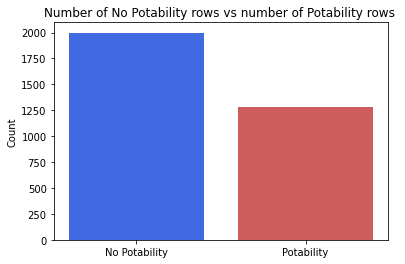

In [ ]:
plt.bar(x=["No Potability", "Potability"], height=[result[0], result[1]], color=["royalblue", "indianred"])
plt.ylabel("Count")
plt.title("Number of No Potability rows vs number of Potability rows ")

Text(0.5, 1.0, 'Percentage of No Potability vs percentage of Potability')

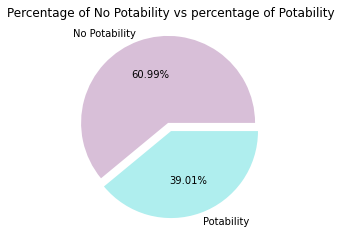

In [ ]:
plt.pie([result[0], result[1]], labels=["No Potability", "Potability"], explode=(0.1, 0), autopct='%1.2f%%', colors=["thistle", "paleturquoise"])
plt.title("Percentage of No Potability vs percentage of Potability")

The dataset is not balanced.

## Outliers, Skewness and Correlation

Here we want to analyze our data to understand if there are outliers, if our data is skew and if there's correlation between data.

### Outliers

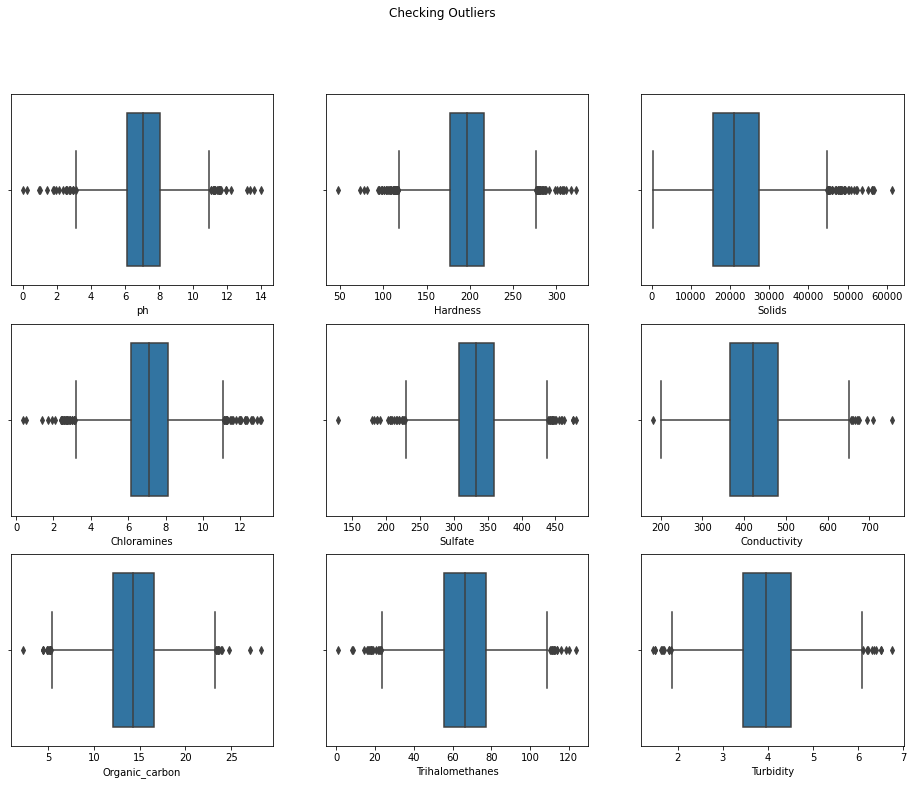

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(16,12))
fig.suptitle('Checking Outliers')
sns.boxplot(ax=ax[0, 0], x = df["ph"], data=df)
sns.boxplot(ax=ax[0, 1], x = df["Hardness"], data=df)
sns.boxplot(ax=ax[0, 2], x = df["Solids"], data=df)
sns.boxplot(ax=ax[1, 0], x = df["Chloramines"], data=df)
sns.boxplot(ax=ax[1, 1], x = df["Sulfate"], data=df)
sns.boxplot(ax=ax[1, 2], x = df["Conductivity"], data=df)
sns.boxplot(ax=ax[2, 0], x = df["Organic_carbon"], data=df)
sns.boxplot(ax=ax[2, 1], x = df["Trihalomethanes"], data=df)
sns.boxplot(ax=ax[2, 2], x = df["Turbidity"], data=df)

As we can see there are a lot of outliers (the points on the left and on the right of the bars).

### Skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

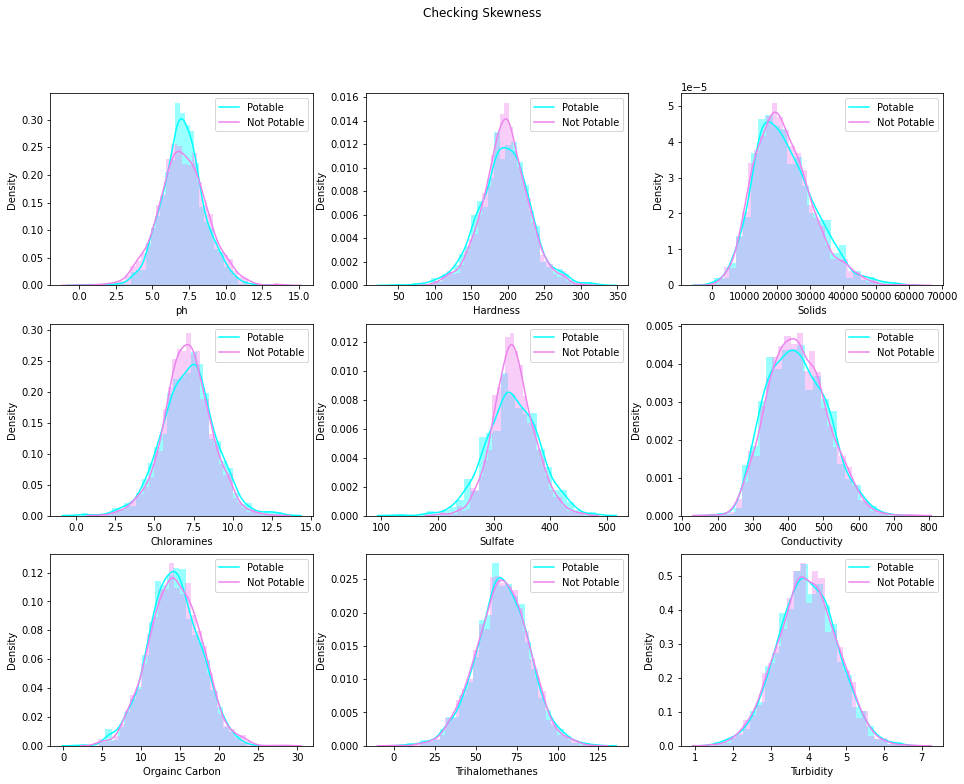

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(16,12))
fig.suptitle('Checking Skewness')
sns.distplot(ax=ax[0, 0], x = df["ph"][df["Potability"] == 1], color='cyan', axlabel="ph")
sns.distplot(ax=ax[0, 0], x = df["ph"][df["Potability"] == 0], color='violet', axlabel="ph")
ax[0, 0].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[0, 1], x = df["Hardness"][df["Potability"] == 1], color='cyan', axlabel="Hardness")
sns.distplot(ax=ax[0, 1], x = df["Hardness"][df["Potability"] == 0], color='violet', axlabel="Hardness")
ax[0, 1].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[0, 2], x = df["Solids"][df["Potability"] == 1], color='cyan', axlabel="Solids")
sns.distplot(ax=ax[0, 2], x = df["Solids"][df["Potability"] == 0], color='violet', axlabel="Solids")
ax[0, 2].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[1, 0], x = df["Chloramines"][df["Potability"] == 1], color='cyan', axlabel="Chloramines")
sns.distplot(ax=ax[1, 0], x = df["Chloramines"][df["Potability"] == 0], color='violet', axlabel="Chloramines")
ax[1, 0].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[1, 1], x = df["Sulfate"][df["Potability"] == 1], color='cyan', axlabel="Sulfate")
sns.distplot(ax=ax[1, 1], x = df["Sulfate"][df["Potability"] == 0], color='violet', axlabel="Sulfate")
ax[1, 1].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[1, 2], x = df["Conductivity"][df["Potability"] == 1], color='cyan', axlabel="Conductivity")
sns.distplot(ax=ax[1, 2], x = df["Conductivity"][df["Potability"] == 0], color='violet', axlabel="Conductivity")
ax[1, 2].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[2, 0], x = df["Organic_carbon"][df["Potability"] == 1], color='cyan', axlabel="Orgainc Carbon")
sns.distplot(ax=ax[2, 0], x = df["Organic_carbon"][df["Potability"] == 0], color='violet', axlabel="Orgainc Carbon")
ax[2, 0].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[2, 1], x = df["Trihalomethanes"][df["Potability"] == 1], color='cyan', axlabel="Trihalomethanes")
sns.distplot(ax=ax[2, 1], x = df["Trihalomethanes"][df["Potability"] == 0], color='violet', axlabel="Trihalomethanes")
ax[2, 1].legend(['Potable', 'Not Potable']) 
sns.distplot(ax=ax[2, 2], x = df["Turbidity"][df["Potability"] == 1], color='cyan', axlabel="Turbidity")
sns.distplot(ax=ax[2, 2], x = df["Turbidity"][df["Potability"] == 0], color='violet', axlabel="Turbidity")
ax[2, 2].legend(['Potable', 'Not Potable']) 

Solids and Conductivity are the two columns that are affected by positive skewness.

The positive skewness is a problem because it means that we have a high number of data points having low values. So when we train the model it will perform better predicting low values than higher.

We can also use skewness to see the direction of the outliers. A positive skew column will have many outliers in the right side of the distribution.


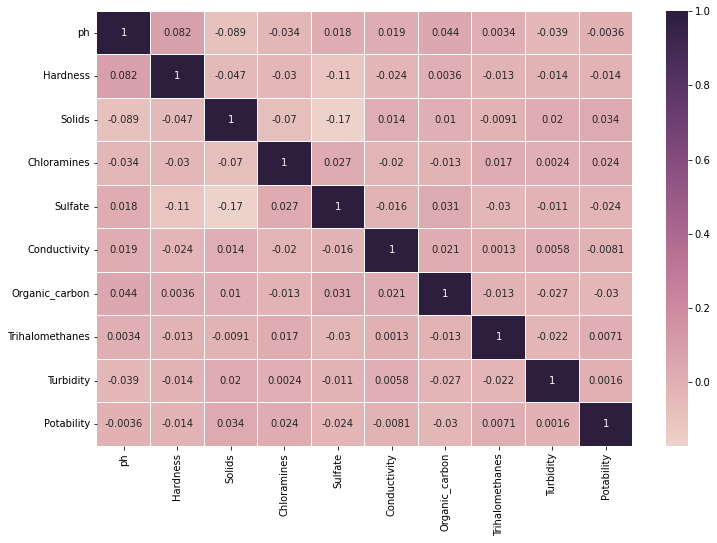

In [ ]:
matrix = np.triu(df.corr())
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,linewidth=.01, cmap=sns.cubehelix_palette(as_cmap=True));

As we can see there is no correlation between the columns.

## Fix Null Values

In this section we will fill the null values of the columns: ph, sulfate and trihalomethanes.

There are three options to fix null values:
* **mean**: If there are outliers this is not the best solution
* **median**: If there are outliers this is recommended
* **drop**: If there are few rows this could be the worse because we lose many data

In [ ]:
# solution = "mean"
solution = "median"
# solution = "drop"

if solution == "mean":
  df.ph = df.ph.fillna(df.ph.mean())
  df.Sulfate = df.Sulfate.fillna(df.Sulfate.mean())
  df.Trihalomethanes = df.Trihalomethanes.fillna(df.Trihalomethanes.mean())
elif solution == "median":
  df.ph = df.ph.fillna(df.ph.median())
  df.Sulfate = df.Sulfate.fillna(df.Sulfate.median())
  df.Trihalomethanes = df.Trihalomethanes.fillna(df.Trihalomethanes.median())
else:
  df = df.dropna()

## Fix outliers

We fix the outliers capping and flooring them.

In [ ]:
substitute = True

if substitute == True:
  for col in df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 -(whisker_width*iqr)
    upper_whisker = q3 + (whisker_width*iqr)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

Next we plotted the new boxplot to see if there are any outliers left.

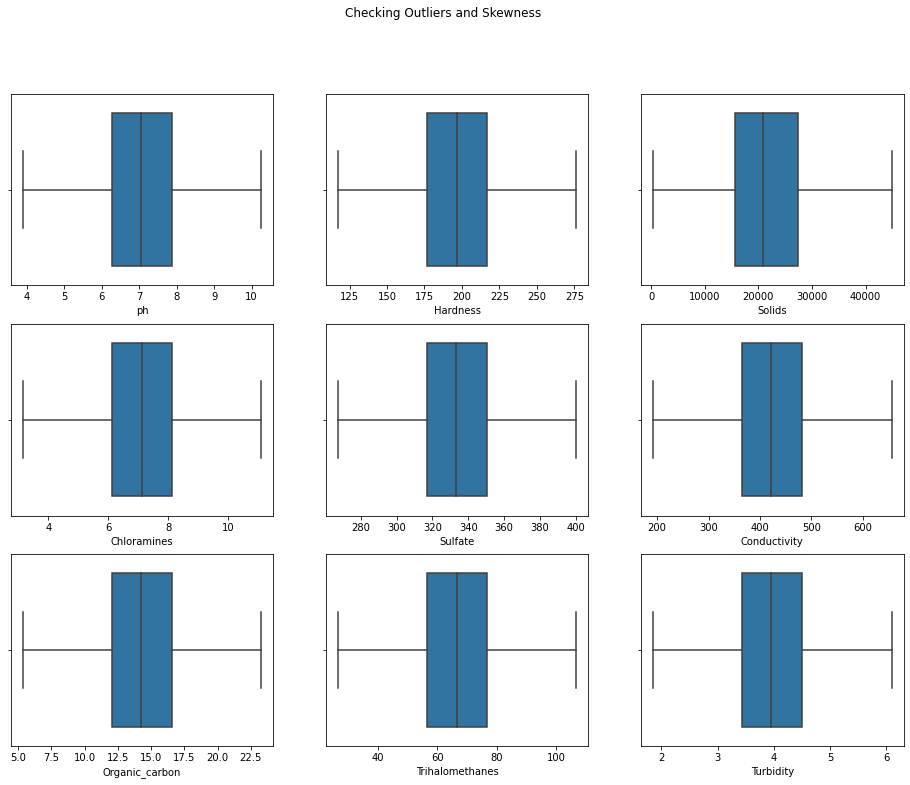

In [ ]:
if substitute == True:
  fig, ax = plt.subplots(3,3, figsize=(16,12))
  fig.suptitle('Checking Outliers and Skewness')
  sns.boxplot(ax=ax[0, 0], x = df["ph"], data=df)
  sns.boxplot(ax=ax[0, 1], x = df["Hardness"], data=df)
  sns.boxplot(ax=ax[0, 2], x = df["Solids"], data=df)
  sns.boxplot(ax=ax[1, 0], x = df["Chloramines"], data=df)
  sns.boxplot(ax=ax[1, 1], x = df["Sulfate"], data=df)
  sns.boxplot(ax=ax[1, 2], x = df["Conductivity"], data=df)
  sns.boxplot(ax=ax[2, 0], x = df["Organic_carbon"], data=df)
  sns.boxplot(ax=ax[2, 1], x = df["Trihalomethanes"], data=df)
  sns.boxplot(ax=ax[2, 2], x = df["Turbidity"], data=df)

## Normalize values

In this section we want to normalize the values, so we take the colums with values over 1 and with values less than 0 and we normalize them using *StandardScaler()*. This scaler uses the mean and the standard deviation to set all values to between 0 and 1.

In [ ]:
### Normalize values

# Take the columns with values over 1
cols_for_scale = df.max()[df.max()>1]
# Take the columns with values less than 0
df.min()[df.min()<0] # It is none there aren't negative values
# Normalize values
scale = StandardScaler()
scaled = scale.fit_transform(df[cols_for_scale.keys()])
# Substitute the old values with the normalized ones
i = 0
for column in cols_for_scale.keys():
    df[column] = scaled[:,i]
    i += 1

# Update labels and data
labels = df['Potability']
data = df.drop(['Potability'], axis=1)

## Balance Dataset using SMOTE
To balance the dataset we use SMOTE (Synthetic Minority Oversampling Technique).

[Link](https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688)

Import SMOTE and resample the data

In [ ]:
sm = SMOTE()
data_new, labels_new = sm.fit_resample(data, labels)

ValueError: ignored

In [ ]:
print('Data shape:', data_new.shape)
print('Labels shape:', labels_new.shape)

Data shape: (3996, 9)
Labels shape: (3996,)


In [ ]:
new_df = pd.Series(labels_new)
result = new_df.value_counts()
zero_percentage = round((result[0]*100)/(result[0]+result[1]),2)
print("No. of 0: "+ str(result[0]) + "\nNo. of 1: " + str(result[1]) + 
      "\nPercentage of 0: "+ str(zero_percentage)+ " %\nPercentage of 1: "+
      str(round((100-zero_percentage),2))+" %")

No. of 0: 1998
No. of 1: 1998
Percentage of 0: 50.0 %
Percentage of 1: 50.0 %


Text(0.5, 1.0, 'Number of No Potability rows vs number of Potability rows ')

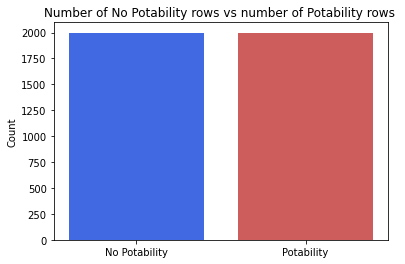

In [ ]:
plt.bar(x=["No Potability", "Potability"], height=[result[0], result[1]], color=["royalblue", "indianred"])
plt.ylabel("Count")
plt.title("Number of No Potability rows vs number of Potability rows ")

Text(0.5, 1.0, 'Percentage of No Potability vs percentage of Potability')

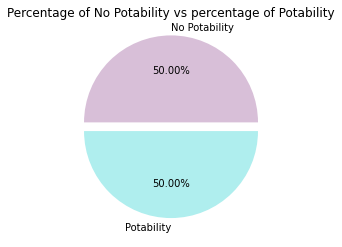

In [ ]:
plt.pie([result[0], result[1]], labels=["No Potability", "Potability"], explode=(0.1, 0), autopct='%1.2f%%', colors=["thistle", "paleturquoise"])
plt.title("Percentage of No Potability vs percentage of Potability")

## Split data into training, validation and test set

Split the data in:
* x_train: The training set data
* y_train: The training set label
* x_valid: The validation set data
* y_valid: The validation set label
* x_test: The validation set data
* y_test: The validation set label

The dimension will be something like

* Training: 70%
* Validation: 20%
* Test: 10%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_new, labels_new, train_size=0.9)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8)

Print all the sizes

In [ ]:
print('Train data shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Validation data shape:', x_valid.shape)
print('Validation labels shape:', y_valid.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (2876, 9)
Train labels shape: (2876,)
Validation data shape: (720, 9)
Validation labels shape: (720,)
Test data shape: (400, 9)
Test labels shape: (400,)


## Create New Model

### Options

In this section there are some boolean variables to tune what the code will do:

* train_model -> True: the network will be trained / False: network wont' be trained
* model_loss -> True: plot the model loss / False: don't plot the model loss
* model_accuracy -> True: plot the model accuracy / False: don't plot the model accuracy
* evaluate_model -> True: evaluate the model / False: don't evaluate the model
* conf_matr -> True: plot the confusion matrix / False: don't plot the confusion matrix
* plot_model -> True: plot the structure of the network / False: don't plot the structure of the network
* save_model -> True: save the model / False: don't save the model

In [ ]:
train_model = True
model_loss = True
model_accuracy = True
evaluate_model = True
conf_matr = True
plot_model = True
save_model = False

### Create the network

In [ ]:
def get_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(9,)))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(48,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])
  return model

model = get_model()

### Train the network

In [ ]:
if train_model == True and solution != "drop":
  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_valid,y_valid))

Epoch 1/200
90/90 [==============================] - 2s 6ms/step - loss: 0.8447 - accuracy: 0.4990 - val_loss: 0.7991 - val_accuracy: 0.5014
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.4864 - val_loss: 0.7914 - val_accuracy: 0.5069
Epoch 3/200
90/90 [==============================] - 0s 4ms/step - loss: 0.7978 - accuracy: 0.4917 - val_loss: 0.7843 - val_accuracy: 0.5069
Epoch 4/200
90/90 [==============================] - 0s 4ms/step - loss: 0.7828 - accuracy: 0.5090 - val_loss: 0.7774 - val_accuracy: 0.5069
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7753 - accuracy: 0.5031 - val_loss: 0.7710 - val_accuracy: 0.5028
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7697 - accuracy: 0.4986 - val_loss: 0.7645 - val_accuracy: 0.5069
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 0.7626 - accuracy: 0.5170 - val_loss: 0.7584 - val_accuracy: 0.5292
Epoch 8/200
9

### Cross Validation

By removing rows we lose many data. This can affect the training of our model, a low number of data could produce a bad model.

To solve this we decided to perform the cross validation, so we divide the dataset in test and training set. We split the training set in 6 parts. At every step the k<sup>a</sup> part of the training set will be the validation, while the remaining part will be the training set. So we train the model for each of k parts avoiding the problem of overfitting.




In [ ]:
if solution == "drop":
  x_train, x_test, y_train, y_test = train_test_split(data_new, labels_new, train_size=0.8)

  max_validation_score = 0
  k = 6
  num_samples = len(x_train) // k
  validation_scores = []
  for fold in range(k):
    validation_data = x_train[num_samples * fold:num_samples * (fold + 1)]
    validation_label = y_train[num_samples * fold:num_samples * (fold + 1)]
    training_data = np.concatenate((x_train[:num_samples * fold], x_train[num_samples * (fold + 1):]))
    training_label = np.concatenate((y_train[:num_samples * fold], y_train[num_samples * (fold + 1):]))
    model = get_model()
    history = model.fit(training_data, training_label,epochs=100, validation_data=(validation_data, validation_label))
    validation_score = model.evaluate(validation_data,validation_label)
    if validation_score[1] > max_validation_score:
      max_validation_score = validation_score[1]
      best_history = history
      best_model = model
    validation_scores.append(validation_score)

  validation_score = np.average(validation_scores)
  result = best_model.evaluate(x_test, y_test)

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.8469 - accuracy: 0.5000 - val_loss: 0.7992 - val_accuracy: 0.4969
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.5225 - val_loss: 0.7949 - val_accuracy: 0.5250
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8105 - accuracy: 0.4844 - val_loss: 0.7908 - val_accuracy: 0.5344
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8005 - accuracy: 0.4931 - val_loss: 0.7869 - val_accuracy: 0.5312
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.4931 - val_loss: 0.7833 - val_accuracy: 0.5312
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.5225 - val_loss: 0.7797 - val_accuracy: 0.5344
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.4806 - val_loss: 0.7765 - val_accuracy: 0.5188
Epoch 8/100
5

In [ ]:
if solution == "drop":
  print(result)
  history = best_history
  model = best_model
  print(max_validation_score)

[0.6147823929786682, 0.6770833134651184]
0.731249988079071


### Loss graph of the model

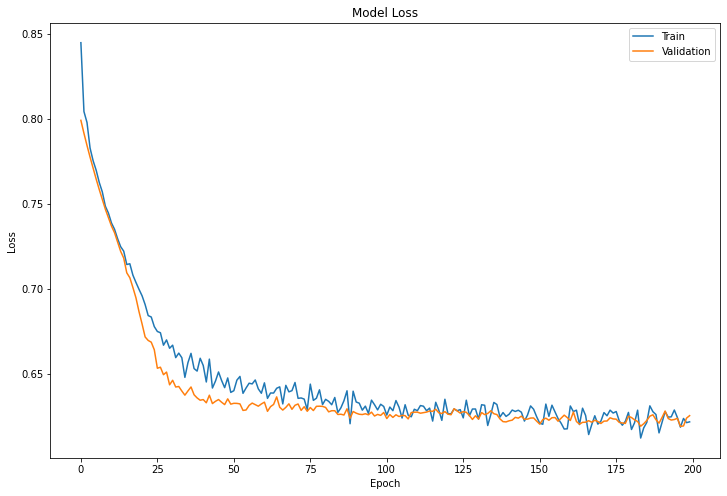

In [ ]:
if model_loss == True:
  plt.subplots(figsize=(12,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

### Accuracy graph of the model

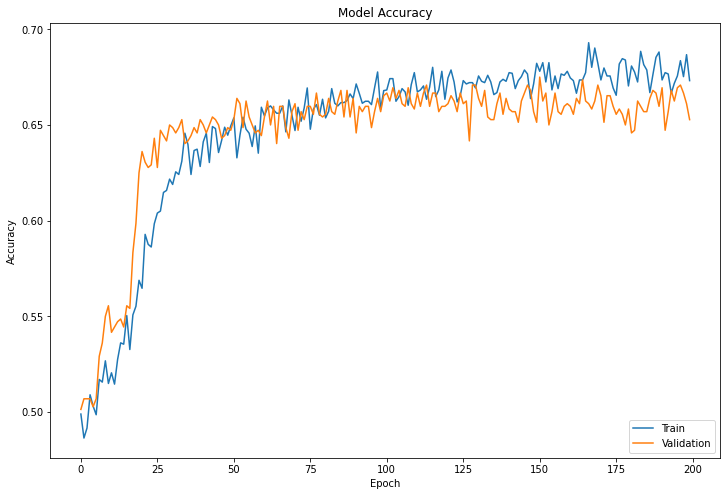

In [ ]:
if model_accuracy == True:
  plt.subplots(figsize=(12,8))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

### Evaluate the model

Check how well the dataset perform on the test set


In [ ]:
if evaluate_model == True:
  model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6500


### Confusion Matrix

Compute the label prediction using the test set and plot the confusion matrix.

              precision    recall  f1-score   support

         0.0       0.70      0.56      0.62       205
         1.0       0.62      0.75      0.68       195

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.66      0.65      0.65       400



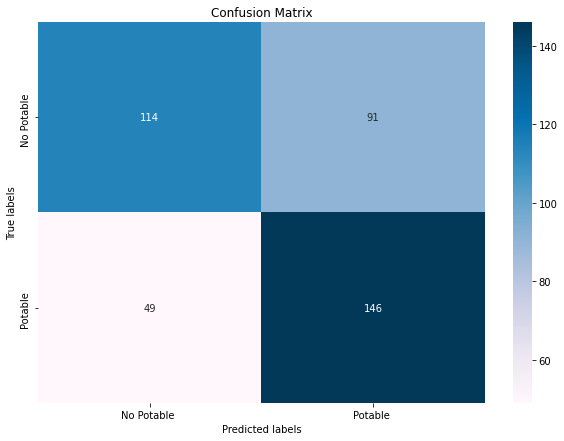

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
if conf_matr == True:
  predictions = model.predict(x_test)
  classes = predictions > 0.5
  cm = confusion_matrix(y_test,classes)

  # Plot
  plt.figure(figsize=(10,7))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="PuBu");  # annot=True to annotate cells, ftm='g' to disable scientific notation
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['No Potable ', 'Potable ']); ax.yaxis.set_ticklabels(['No Potable ', 'Potable ']);
  print(classification_report(y_test,classes))

### Test performance original value

In [ ]:
x_original_train, x_original_test, y_original_train, y_original_test = train_test_split(data, labels, train_size=0.9)


              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       212
         1.0       0.52      0.80      0.63       116

    accuracy                           0.67       328
   macro avg       0.68      0.70      0.67       328
weighted avg       0.73      0.67      0.68       328



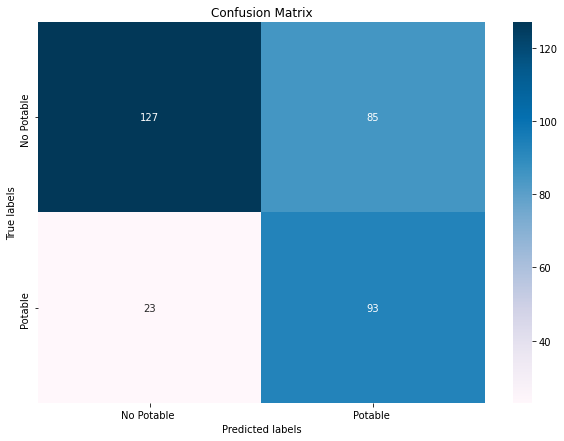

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
if conf_matr == True:
  predictions = model.predict(x_original_test)
  classes = predictions > 0.5
  cm = confusion_matrix(y_original_test,classes)

  # Plot
  plt.figure(figsize=(10,7))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="PuBu");  # annot=True to annotate cells, ftm='g' to disable scientific notation
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['No Potable ', 'Potable ']); ax.yaxis.set_ticklabels(['No Potable ', 'Potable ']);
  print(classification_report(y_original_test,classes))

### Plot model

In [ ]:
if plot_model == True:
  dot_img_file = "network.png"
  keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

### Save the model

In [ ]:
if save_model == False:
  file_name = 'acc_69'
  model.save(file_name)

! zip -r model.zip acc_69/

INFO:tensorflow:Assets written to: acc_69/assets
updating: acc_69/ (stored 0%)
updating: acc_69/keras_metadata.pb (deflated 91%)
updating: acc_69/saved_model.pb (deflated 90%)
updating: acc_69/variables/ (stored 0%)
updating: acc_69/variables/variables.index (deflated 66%)
updating: acc_69/variables/variables.data-00000-of-00001 (deflated 13%)
updating: acc_69/assets/ (stored 0%)


## Load the model

Load on colab the model.zip file. Uncomment to use this section

Unzip the model

In [ ]:
# ! unzip model.zip

Import the model

In [ ]:
# file_name = 'acc_69'
# model = keras.models.load_model(file_name)

# A

In [ ]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6771


[0.6147823929786682, 0.6770833134651184]